## Making TF records from Solar Data Tutorial

In [1]:
# import necessary packages

#from __future__ import absolute_import, division, print_function
#import argparse
#import multiprocessing
import os
import sys
import numpy as np
#import pdb
from random import shuffle
import pandas as pd
import tensorflow as tf
from astropy.io import fits
from astropy.io.fits import getheader
import tensorflow as tf
from tf_util import example_util
import matplotlib.pylab as plt

In [2]:
# read in the HARPS data that has been shifted and is ready for being added to TF records

# set outfile to filename
# outfile = 'HARPS2.3.1_ready_for_TF_records.npz'
outfile = 'New_HARPS_ready_for_TF_records.npz'
org_file = 'HARPS2.3.1_ready_for_TF_records.npz'
# load the file
npzfile = np.load(outfile) 
onpzfile = np.load(org_file)

# List the column names in this file
npzfile.files

['BJD',
 'vrad_star',
 'og_ccf_list',
 'jup_shifted_CCF_data_list',
 'zero_shifted_CCF_list',
 'CCF_normalized_list',
 'cff_residual_list',
 'CCF_normalized_list_cutoff',
 'CCF_residual_list_cutoff',
 'ccf_residual_rescaled',
 'ccf_residual_rescaled_cutoff',
 'mu_og_list',
 'mu_jup_list',
 'mu_zero_list',
 'fwhm',
 'cont',
 'bis',
 'shift_by_rv']

In [3]:
#for key in npzfile.files:
    # Access the array using the key and get its shape
#    print(f"Shape of {key}: {npzfile[key].shape}")

In [4]:
y_data = npzfile['og_ccf_list'][0]
y2_data = onpzfile['og_ccf_list'][1]
y3_data = y2_data + y_data
y3_data

array([2.56874774e+08, 2.56488224e+08, 2.56070938e+08, 2.55666959e+08,
       2.55362659e+08, 2.55165959e+08, 2.55043789e+08, 2.55005730e+08,
       2.55062609e+08, 2.55136846e+08, 2.55189481e+08, 2.55132356e+08,
       2.54851211e+08, 2.54085461e+08, 2.52390636e+08, 2.49143269e+08,
       2.43542454e+08, 2.34582041e+08, 2.21322386e+08, 2.03394057e+08,
       1.81483334e+08, 1.57727468e+08, 1.35568898e+08, 1.18932281e+08,
       1.11279206e+08, 1.14551858e+08, 1.28436080e+08, 1.50081778e+08,
       1.74978166e+08, 1.98702451e+08, 2.18350062e+08, 2.32983640e+08,
       2.43032093e+08, 2.49418599e+08, 2.53177141e+08, 2.55213916e+08,
       2.56182330e+08, 2.56534557e+08, 2.56560103e+08, 2.56475966e+08,
       2.56356835e+08, 2.56298548e+08, 2.56274314e+08, 2.56333318e+08,
       2.56447858e+08, 2.56576229e+08, 2.56725577e+08, 2.56839698e+08,
       2.56894903e+08])

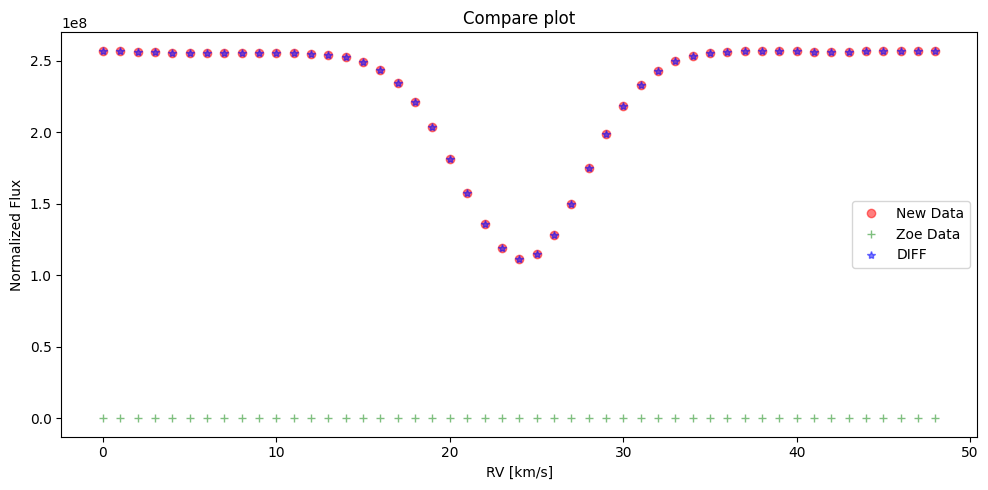

In [5]:

plt.figure(figsize=(10, 5))

# Plot Data
plt.plot(y_data, 'o', color='red', label='New Data', alpha=0.5)
plt.plot(y2_data, '+', color='green', label='Zoe Data', alpha=0.5)
plt.plot(y3_data, '*', color='blue', label='DIFF', alpha=0.5)
# Plot Fitted Curve
# We generate a smoother x-axis for the line plot
# x_smooth = np.linspace(min(x_data), max(x_data), 1000)
# plt.plot(x_smooth, inverted_gaussian(x_smooth, *popt), 'k--', lw=2, label=f'Gaussian Fit (Center={fit_mean:.4f})')

plt.legend()
plt.xlabel("RV [km/s]")
plt.ylabel("Normalized Flux")
plt.title("Compare plot")
plt.tight_layout()
plt.show()

In [6]:
from datetime import datetime, timedelta
def BJD2dates(date_values):
    """
    Accepts an array of float dates (JD or MJD), sorts them, 
    and prints the readable ISO format.
    """
    # Ensure input is a numpy array and sort it
    dates_arr = np.sort(np.array(date_values, dtype=np.float64))
    
    # MJD Epoch (November 17, 1858)
    epoch = datetime(1858, 11, 17)
    
    # Header for the output
    print(f"{'Original Value':<20} | {'Type':<5} | {'Readable Date (UTC/ISO)'}")
    print("-" * 60)
    
    for val in dates_arr:
        # Determine if the value is JD or MJD
        if val > 2400000:
            # Convert JD to MJD
            mjd_value = val - 2400000.5
            date_type = "JD"
        else:
            # Already MJD
            mjd_value = val
            date_type = "MJD"

        # Convert to datetime object
        # timedelta handles the fractional days (time) automatically
        readable_date = epoch + timedelta(days=float(mjd_value))
        
        # Print formatted row
        print(f"{val:<18.10f} | {date_type:<5} | {readable_date.isoformat()}")

In [7]:
# BJD2dates(npzfile['BJD'])

In [8]:
BJD2dates(npzfile['BJD'])

Original Value       | Type  | Readable Date (UTC/ISO)
------------------------------------------------------------
57232.4244183282   | MJD   | 2015-07-29T10:11:09.743553
57282.4641876048   | MJD   | 2015-09-17T11:08:25.809055
57476.4140912891   | MJD   | 2016-03-29T09:56:17.487377
57819.4185927224   | MJD   | 2017-03-07T10:02:46.411219
57978.6210300725   | MJD   | 2017-08-13T14:54:16.998268


## Try adding a new feature now :)